In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

#import dataset
df = pd.read_csv('/content/iris-1_1770661990.csv', header=None)

X = df.iloc[:100, [2, 3]].values                        # Selecting petal length and width for first 100 rows
y = np.where(df.iloc[:100, 4] == 'Iris-setosa', -1, 1)  # Target is -1 for setosa, 1 otherwise

# Display the first 5 rows of X and y

print("First 5 rows of X:\n", X[:5])
print("\nFirst 5 elements of y:\n", y[:5])


First 5 rows of X:
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]

First 5 elements of y:
 [-1 -1 -1 -1 -1]


In [8]:
class Perceptron():

    def __init__(self, lrate=0.1, no_iter=50):
        self.lrate = lrate
        self.no_iter = no_iter

    def fit(self, X, y):
        self.ww = [random.uniform(-1.0, 1.0) for _ in range(1 + X.shape[1])]
        self.list_errors = []

        for _ in range(self.no_iter):
            cur_error = 0  # track errors per iteration
            for xx, label in zip(X, y):
                net_input = self.ww[0] + sum(w * x for w, x in zip(self.ww[1:], xx))

                # Predict output (activation function)
                output = 1 if net_input >= 0 else -1

                # Calculate the delta (weight update)
                delta = self.lrate * (label - output)

                # Update weights if delta is not zero
                if delta != 0:
                    # Update bias weight
                    self.ww[0] += delta
                    # Update feature weights
                    self.ww[1:] = [w + delta * x for w, x in zip(self.ww[1:], xx)]
                    cur_error += 1  # Increment error if delta != 0

            # Append current iteration error count to list_errors
            self.list_errors.append(cur_error)

        return self

In [7]:
# Compute the net input, i.e., sum of X and the weights plus the bias value
def net_input(self, X):
    return np.dot(X, self.ww[1:]) + self.ww[0]

# Predict a classification for a sample of features X
def predict(self, X):
    net_in = self.net_input(X)
    return 1 if net_in > 0 else -1


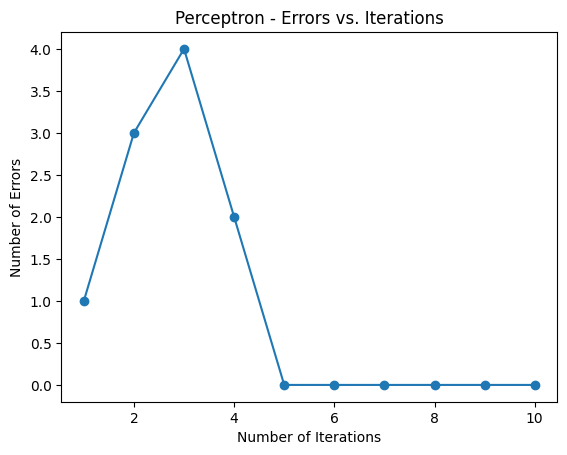

In [6]:
import matplotlib.pyplot as plt
model = Perceptron(no_iter=10)
model.fit(X, y)

# Plot errors against number of iterations
plt.plot(range(1, model.no_iter + 1), model.list_errors, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Number of Errors')
plt.title('Perceptron - Errors vs. Iterations')
plt.show()
